**1. Analise os dados do seguinte dataset.**


In [1]:
from sklearn.decomposition import PCA
import pandas as pd

In [2]:
url="https://raw.githubusercontent.com/masterfloss/data/main/dadosMundo.csv"
df=pd.read_csv(url) 
df

,Country,Area_km2,Population,Birth rate(births/1000 population),Death rate(deaths/1000 population),Electricity – consumption(kWh) per capita,Electricity – production(kWh) per capita,GDPpercapita,GDP - real growth rate(%),Industrial production growth rate(%),...,Internet users in the per 1000 people,Investment (gross fixed)(% of GDP),Life expectancy at birth(years),MilitPercentGDP,Oil – consumption(bbl/day) per 1000 persons,Public debt(% of GDP),Telephones - main lines in use per capita,Telephones - mobile cellular per capita,Total fertility rate(children born/woman),Unemploy rate(%)
0,Afghanistan,647500,29928987.0,47.02,20.75,21.791583,18.042709,800.0,7.5,NaN,...,0.033412,NaN,42.90,2.60,0.116943,NaN,0.001106,0.000501,6.75,NaN
1,Akrotiri,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,28748,3563112.0,15.08,5.12,1897.217938,1594.112113,4900.0,5.6,3.1,...,8.419606,18.4,77.24,1.49,2.104902,NaN,0.071567,0.308719,2.04,14.8
3,Algeria,2381740,32531853.0,17.13,4.60,725.750236,791.839309,6600.0,6.1,6.0,...,15.369552,26.2,73.00,3.20,6.424473,37.4,0.067614,0.044489,1.92,25.4
4,American Samoa,199,57881.0,23.13,3.33,2088.768335,2245.987457,8000.0,NaN,NaN,...,NaN,NaN,75.84,NaN,65.651941,NaN,0.259152,0.041067,3.25,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,West Bank,5860,2385615.0,32.37,3.99,NaN,NaN,800.0,6.0,NaN,...,60.780973,NaN,73.08,NaN,NaN,NaN,0.126424,0.201206,4.40,27.2
259,Western Sahara,266000,273008.0,NaN,NaN,306.584422,329.660669,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.593213,NaN,NaN,NaN,NaN,NaN
260,Yemen,527970,20727063.0,43.07,8.53,136.391731,146.668151,800.0,1.9,3.0,...,4.824610,16.1,61.75,7.80,3.763196,46.4,0.026159,0.019834,6.67,35.0
261,Zambia,752614,11261795.0,41.38,20.23,474.613505,725.195229,900.0,4.6,6.9,...,6.055873,41.4,39.70,1.80,0.976754,127.5,0.007850,0.021400,5.47,50.0


In [3]:
df.dtypes

Country                                            object
Area_km2                                            int64
Population                                        float64
Birth rate(births/1000 population)                float64
Death rate(deaths/1000 population)                float64
Electricity – consumption(kWh) per capita         float64
Electricity – production(kWh) per capita          float64
GDPpercapita                                      float64
GDP - real growth rate(%)                         float64
Industrial production growth rate(%)              float64
Infant mortality rate(deaths/1000 live births)    float64
Inflation rate (consumer prices)(%)               float64
Internet users in the per 1000 people             float64
Investment (gross fixed)(% of GDP)                float64
Life expectancy at birth(years)                   float64
MilitPercentGDP                                   float64
Oil – consumption(bbl/day) per 1000 persons       float64
Public debt(% 

Com as analises anteriores conseguimos perceber que este dataset apresentam valores para varias variaveis, tais como o GDB per capita, taxas de nascimento e nascimento, taxas de inflação, entre outras, para varios paises. Praticamente todos os valores são do tipo float à excepção de country que é um objeto e area_km2 que é um inteiro.
Ao todo são 22 colunas e 263 linhas. 

**2. Identifique grupos de países com características idênticas.**

In [4]:
#Apagar todos os campos onde nao acham valores inseridos.
#Para uma melhor analise todas as variaveis devem ter valores inscritos em todas as linhas.
X=df.dropna()
X

,Country,Area_km2,Population,Birth rate(births/1000 population),Death rate(deaths/1000 population),Electricity – consumption(kWh) per capita,Electricity – production(kWh) per capita,GDPpercapita,GDP - real growth rate(%),Industrial production growth rate(%),...,Internet users in the per 1000 people,Investment (gross fixed)(% of GDP),Life expectancy at birth(years),MilitPercentGDP,Oil – consumption(bbl/day) per 1000 persons,Public debt(% of GDP),Telephones - main lines in use per capita,Telephones - mobile cellular per capita,Total fertility rate(children born/woman),Unemploy rate(%)
3,Algeria,2381740,32531853.0,17.13,4.60,725.750236,791.839309,6600.0,6.1,6.0,...,15.369552,26.2,73.00,3.2,6.424473,37.4,0.067614,0.044489,1.92,25.4
10,Argentina,2766890,39537943.0,16.90,7.56,2065.104904,2058.528943,12400.0,8.3,12.0,...,103.697858,18.3,75.91,1.3,12.291990,118.0,0.202575,0.164399,2.19,14.8
14,Australia,7686850,20090437.0,12.26,7.44,9755.885350,10452.734303,30700.0,3.5,1.9,...,471.468092,25.3,80.39,2.7,39.645728,17.4,0.538316,0.714121,1.76,5.1
15,Austria,83870,8184691.0,8.81,9.70,6730.858868,7146.268564,31300.0,1.9,3.3,...,455.728872,22.6,78.92,0.9,32.059854,64.2,0.474178,0.866801,1.36,4.4
16,Azerbaijan,86600,7911974.0,20.40,9.86,2195.406608,2218.156935,3800.0,9.8,4.0,...,37.917213,65.1,63.35,2.6,17.694699,18.9,0.116760,0.109960,2.44,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Venezuela,912050,25375281.0,18.91,4.90,3519.172852,3534.936224,5800.0,16.8,12.3,...,50.222104,12.9,74.31,1.5,19.704215,43.1,0.111991,0.254720,2.26,17.1
254,Vietnam,329560,83535576.0,17.07,6.20,383.788579,412.758272,2700.0,7.7,16.0,...,41.898316,36.6,70.61,2.5,2.214625,65.9,0.052696,0.032824,1.94,1.9
260,Yemen,527970,20727063.0,43.07,8.53,136.391731,146.668151,800.0,1.9,3.0,...,4.824610,16.1,61.75,7.8,3.763196,46.4,0.026159,0.019834,6.67,35.0
261,Zambia,752614,11261795.0,41.38,20.23,474.613505,725.195229,900.0,4.6,6.9,...,6.055873,41.4,39.70,1.8,0.976754,127.5,0.007850,0.021400,5.47,50.0


In [5]:
#Apagar a variavel Country. Não traz informações relevantes para os modelos e regressoes.
X1=X.drop(['Country'], axis=1)
X1

,Area_km2,Population,Birth rate(births/1000 population),Death rate(deaths/1000 population),Electricity – consumption(kWh) per capita,Electricity – production(kWh) per capita,GDPpercapita,GDP - real growth rate(%),Industrial production growth rate(%),Infant mortality rate(deaths/1000 live births),...,Internet users in the per 1000 people,Investment (gross fixed)(% of GDP),Life expectancy at birth(years),MilitPercentGDP,Oil – consumption(bbl/day) per 1000 persons,Public debt(% of GDP),Telephones - main lines in use per capita,Telephones - mobile cellular per capita,Total fertility rate(children born/woman),Unemploy rate(%)
3,2381740,32531853.0,17.13,4.60,725.750236,791.839309,6600.0,6.1,6.0,31.00,...,15.369552,26.2,73.00,3.2,6.424473,37.4,0.067614,0.044489,1.92,25.4
10,2766890,39537943.0,16.90,7.56,2065.104904,2058.528943,12400.0,8.3,12.0,15.18,...,103.697858,18.3,75.91,1.3,12.291990,118.0,0.202575,0.164399,2.19,14.8
14,7686850,20090437.0,12.26,7.44,9755.885350,10452.734303,30700.0,3.5,1.9,4.69,...,471.468092,25.3,80.39,2.7,39.645728,17.4,0.538316,0.714121,1.76,5.1
15,83870,8184691.0,8.81,9.70,6730.858868,7146.268564,31300.0,1.9,3.3,4.66,...,455.728872,22.6,78.92,0.9,32.059854,64.2,0.474178,0.866801,1.36,4.4
16,86600,7911974.0,20.40,9.86,2195.406608,2218.156935,3800.0,9.8,4.0,81.74,...,37.917213,65.1,63.35,2.6,17.694699,18.9,0.116760,0.109960,2.44,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,912050,25375281.0,18.91,4.90,3519.172852,3534.936224,5800.0,16.8,12.3,22.20,...,50.222104,12.9,74.31,1.5,19.704215,43.1,0.111991,0.254720,2.26,17.1
254,329560,83535576.0,17.07,6.20,383.788579,412.758272,2700.0,7.7,16.0,25.95,...,41.898316,36.6,70.61,2.5,2.214625,65.9,0.052696,0.032824,1.94,1.9
260,527970,20727063.0,43.07,8.53,136.391731,146.668151,800.0,1.9,3.0,61.50,...,4.824610,16.1,61.75,7.8,3.763196,46.4,0.026159,0.019834,6.67,35.0
261,752614,11261795.0,41.38,20.23,474.613505,725.195229,900.0,4.6,6.9,88.29,...,6.055873,41.4,39.70,1.8,0.976754,127.5,0.007850,0.021400,5.47,50.0


In [6]:
#Stantarizar os dados
from sklearn.preprocessing import StandardScaler
model=StandardScaler()
X1=model.fit_transform(X1)
X1.shape

(93, 21)

In [7]:
#Criar um PCA que reduz o numero de features para 4
PCAModel = PCA(n_components=4)
#Transforma os features
XPCA = PCAModel.fit(X1).transform(X1)
XPCA

array([[-1.73013241e+00, -1.38369764e+00,  3.79387126e-01,
        -6.18295876e-02],
       [-5.45346589e-01, -1.74932555e+00,  2.32917332e-01,
        -2.50314360e-01],
       [ 3.83197548e+00, -5.89522688e-02, -2.56638057e-01,
         2.89352714e+00],
       [ 3.49184949e+00,  8.26240545e-01, -8.98532870e-01,
        -4.75027037e-01],
       [-2.12088420e+00, -2.64922835e+00, -1.87660270e+00,
        -9.33659962e-02],
       [ 1.89866128e+00,  1.26415207e+00,  2.20491735e+00,
         4.69157773e-01],
       [-3.96427953e+00,  2.18464818e-02, -1.92999009e-01,
         1.58794251e-01],
       [ 3.21139909e+00,  1.24388606e+00, -3.02237769e-01,
        -2.75563848e-01],
       [-3.60946641e+00,  1.85459004e+00, -3.50847285e+00,
         8.07407447e-01],
       [-8.15316115e-01, -1.86009346e+00, -6.08512128e-02,
         2.42804010e+00],
       [ 3.65461148e-01, -5.13184601e-03, -1.09701216e+00,
        -6.31692439e-01],
       [-4.65656724e+00,  1.29257774e+00, -4.39777968e-01,
      

In [8]:
#Passamos assim a ter 93 linhas e apenas 4 colunas
XPCA.shape

(93, 4)

In [9]:
#imprime o numero de fetures inicial e atual
print('Original number of features:', X1.shape[1])
print('Reduced number of features:', XPCA.shape[1])

Original number of features: 21
Reduced number of features: 4


In [10]:
 PCAModel.components_.T
#Para valores proximos de 0 a nova variavel explica pouco da originar.
#Para valores a cima ou abaixo de 0 significa que explica mais ou menos que a variavel inicial.

array([[-0.00277726, -0.20991483, -0.02135224,  0.62960884],
       [-0.03792603, -0.27864217, -0.06302502,  0.54677099],
       [-0.2803788 ,  0.15690514,  0.25286932,  0.12656772],
       [-0.08616507,  0.2256952 , -0.55786651,  0.07485365],
       [ 0.28555832,  0.15285908,  0.01567182,  0.22032221],
       [ 0.28076962,  0.14967927,  0.03649142,  0.20575065],
       [ 0.316945  ,  0.13989084, -0.05163858,  0.13989298],
       [ 0.01228127, -0.45841864,  0.0477068 , -0.02731498],
       [-0.03720158, -0.41735262, -0.1149418 , -0.00740534],
       [-0.2985045 ,  0.04990481, -0.1011668 ,  0.15611562],
       [-0.12861428,  0.25762969, -0.2204196 ,  0.08001203],
       [ 0.31174028,  0.10447116, -0.08442763,  0.06705761],
       [-0.00332839, -0.26469827, -0.2898024 ,  0.04703188],
       [ 0.27787043, -0.16910492,  0.26522124, -0.13460854],
       [-0.02865598,  0.08626204,  0.45906251,  0.21508452],
       [ 0.24023261,  0.11162006,  0.20245479,  0.12436822],
       [-0.01926354,  0.

In [ ]:
# 0- Riqueza.
# 1- Declinio e Desemprego
# 2- Crescimento Militar
# 3- Dimensao do país. 

In [11]:
PCAModel.components_.shape
#As novas 4 variaveis explicam as 21 variaveis antigas.

(4, 21)

In [12]:
#Mostra o racio explicado por cada variavel
PCAModel.explained_variance_ratio_

array([0.38778049, 0.13816718, 0.08998581, 0.07379129])

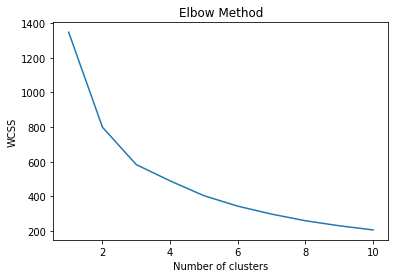

In [15]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(XPCA)
    wcss.append(model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
for i in range(len(X['GDPpercapita'])):
    if 'GDPpercapita'>15000:
        X.loc[i,'GDPpercapita']=X.loc[i,'GDPpercapita'].drop('GDPpercapita')
    else:
         X.loc[i,'GDPpercapita']=X.loc[i,'GDPpercapita']
#tentei fazer um ciclo mas nao deu. Era mais ou menos assim?

TypeError: '>' not supported between instances of 'str' and 'int'

In [16]:
#Apagar todas as linhas onde o valor do GDPpercapita é inferior ou igual a 30000
index_names = X[ X['GDPpercapita'] <= 30000 ].index 
BigGDP=X.drop(index_names, inplace = True) 
BigGDP

C:\Users\pedro\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Ao ir restringindo os valores de certas variaveis ficamos com menos linhas o que facilita a analise.
Por exemplo aqui recorri ao dataset sem os valores em N.A para ver que paises têm valores de GDPpercapita superiores a 30000 e consegue-se concluir que apenas 8 dos iniciais 93 apresentam tais valores.

Text(0, 0.5, 'GDPpercapita')

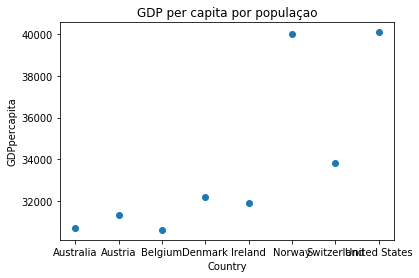

In [17]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
plt.scatter(X['Country'], X['GDPpercapita'])
plt.title('GDP per capita por populaçao')
plt.xlabel('Country')
plt.ylabel('GDPpercapita')
#Ao recorrer ao dataset com a restrição de apresentar apenas paises com valores elevados de GDPpercapita consegue-se fazer o seguinte gráfico
